In [1]:
data = {}
#Need to iterate through the directory FastaData to get a dictionary of key = "filename" and value = dictionary of key = "header" and value = "sequence"
import os
import re
import sys


In [2]:
def get_fasta_files(directory):
    files = os.listdir(directory)
    fasta_files = []
    for file in files:
        if re.search(r"\.fasta$", file):
            fasta_files.append(file)
    return fasta_files

In [3]:
fasta_files = get_fasta_files("chi")

In [4]:
for file in fasta_files:
    with open("chi/" + file, "r") as f:
        data[file] = {}

In [5]:
from Bio import SeqIO
for file in fasta_files:
    for record in SeqIO.parse("chi/" + file, "fasta"):
        data[file][record.id] = str(record.seq)

In [6]:
#Now that I have the data in the dictionary I need to first get the data 
sequences = []
labels = []
for file in data:
    for header in data[file]:
        sequences.append(data[file][header])
        labels.append(header)

In [7]:
len(sequences)
len(labels)

#find avg length of sequences
total_length = 0
for seq in sequences:
    total_length += len(seq)
avg_length = total_length / len(sequences)
print(avg_length)

4640.19


In [90]:
adj_matrix = [[0 for i in range(len(sequences))] for j in range(len(sequences))]

In [19]:
def get_kmers(sequence, k):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i+k])
    return kmers

In [92]:
from datasketch import MinHash, MinHashLSH


In [93]:
adj_matrix = [[0 for i in range(len(sequences))] for j in range(len(sequences))]
#Create a list of MinHash objects
minhashes = []
for i in range(len(sequences)):
    minhash = MinHash(num_perm=128)
    kmers = get_kmers(sequences[i], 3)
    for kmer in kmers:
        minhash.update(kmer.encode('utf8'))
    minhashes.append(minhash)

In [94]:
for i in range(len(sequences)):
    for j in range(i, len(sequences)):
        jaccard = minhashes[i].jaccard(minhashes[j])
        adj_matrix[i][j] = jaccard
        adj_matrix[j][i] = jaccard

In [95]:
adj_matrix[0][0]

1.0

In [96]:
import numpy as np

In [97]:
adj_new = 1 - np.array(adj_matrix)

/tmp/ipykernel_43670/3256875486.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_new, 'ward')


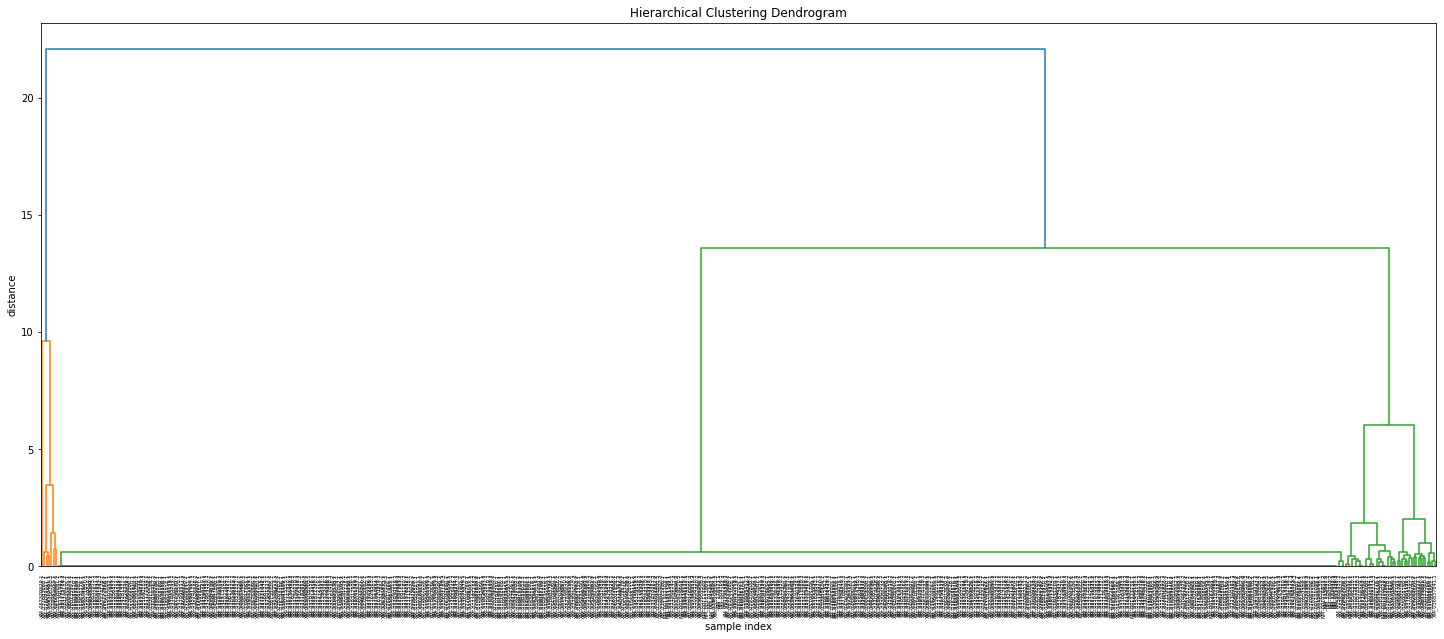

In [101]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Z = linkage(adj_new, 'ward')
# plt.figure(figsize=(25, 10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(Z, labels=labels, leaf_rotation=90)
# plt.show()

# #download the dendrogram
# plt.savefig("dendrogram.png")

#adjust the horizontal scale 
Z = linkage(adj_new, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels, leaf_rotation=90)
plt.show()


In [104]:
num_clusters = 2
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, num_clusters, criterion='maxclust')
from collections import Counter
Counter(clusters)

Counter({2: 593, 1: 7})

In [108]:
adj_matrix_exp = [[0 for i in range(len(sequences))] for j in range(len(sequences))]

# adj_matrix_exp = e^(adj_matrix)
import math
for i in range(len(sequences)):
    for j in range(len(sequences)):
        adj_matrix_exp[i][j] = 100**adj_matrix[i][j]

In [109]:
from sklearn.cluster import KMeans
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(adj_matrix_exp)
clusters = kmeans.labels_
Counter(clusters)

Counter({0: 568, 1: 32})

In [110]:
Counter(clusters[300:])

Counter({0: 290, 1: 10})

In [81]:
print(adj_matrix_exp[0][1], adj_matrix_exp[0][298], adj_matrix_exp[0][301], adj_matrix_exp[0][598])

3219678.444251379 2206734.06908459 1512472.5453106235 1036632.928437698


In [83]:
for i in range(1,11):
    print("womp",adj_matrix_exp[0][i],"back", adj_matrix_exp[0][599-i])

womp 3219678.444251379 back 1036632.928437698
womp 1512472.5453106235 back 177827.94100389228
womp 1945640.0615886357 back 1175743.265920711
womp 4697588.816706492 back 626433.5366568855
womp 3651741.272548377 back 2206734.06908459
womp 2838735.9647587547 back 1512472.5453106235
womp 5327978.945865641 back 1333521.432163324
womp 3219678.444251379 back 7635.060803383346
womp 3219678.444251379 back 626433.5366568855
womp 2206734.06908459 back 1512472.5453106235


In [8]:
## PAIRWISE ALIGNMENT
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [88]:


# Define two sequences
sequence1 = "ACGTAGC"
sequence2 = "ACGGTAG"

# Perform pairwise sequence alignment
alignments = pairwise2.align.globalxx(sequence1, sequence2)

# Extract alignment scores from alignments
alignment_scores = [alignment[2] for alignment in alignments]

# Print alignment scores
for alignment in alignment_scores:
    print("Alignment Score:", alignment)


Alignment Score: 6.0
Alignment Score: 6.0


/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [90]:
#let's do pairwise alignment and maybe cluster now that we have the scores for each pair

adj_matrix_pairwise = [[0 for i in range(len(sequences))] for j in range(len(sequences))]



In [92]:
# for i in range(len(sequences)):
#     for j in range(i, len(sequences)):
#         alignments = pairwise2.align.globalxx(sequences[i], sequences[j])
#         alignment_scores = alignments[0][2]
#         adj_matrix_pairwise[i][j] = alignment_scores
#         adj_matrix_pairwise[j][i] = alignment_scores


#use tqdm to see progress
# from tqdm import tqdm
# for i in tqdm(range(len(sequences))):
#     for j in range(i, len(sequences)):
#         alignments = pairwise2.align.globalxx(sequences[i], sequences[j])
#         alignment_scores = alignments[0][2]
#         adj_matrix_pairwise[i][j] = alignment_scores
#         adj_matrix_pairwise[j][i] = alignment_scores


#Can you do this in parallel?
import multiprocessing
from joblib import Parallel, delayed
import itertools

def pairwise_align(i, j):
    alignments = pairwise2.align.globalxx(sequences[i], sequences[j])
    alignment_scores = alignments[0][2]
    return alignment_scores

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(pairwise_align)(i, j) for i, j in itertools.combinations(range(len(sequences)), 2))

#Convert results to adj_matrix_pairwise
adj_matrix_pairwise = [[0 for i in range(len(sequences))] for j in range(len(sequences))]
index = 0
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        adj_matrix_pairwise[i][j] = results[index]
        adj_matrix_pairwise[j][i] = results[index]
        index += 1


/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consi

In [ ]:
#Instead of this can i use pytorch tensors to do this on gpu 

import torch
import torch.nn.functional as F

#Convert adj_matrix_pairwise to a tensor
adj_matrix_pairwise_tensor = torch.tensor(adj_matrix_pairwise)


#Run pairwise alignment on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
adj_matrix_pairwise_tensor = adj_matrix_pairwise_tensor.to(device)

#create gpu_function to run pairwise alignment
def gpu_pairwise_align(i, j):
    alignments = pairwise2.align.globalxx(sequences[i], sequences[j])
    alignment_scores = alignments[0][2]
    return alignment_scores

#Run pairwise alignment on GPU

num_cores = multiprocessing.cpu_count()



In [9]:
### SUBSET OF DATA 

sequences1 = sequences[:10]
labels1 = labels[:10]
sequences2 = sequences[300:310]
labels2 = labels[300:310]


sequences_pairwise = []
sequences_pairwise.extend(sequences1)
sequences_pairwise.extend(sequences2)

In [11]:
from tqdm import tqdm
adj_matrix_pairwise = [[0 for i in range(len(sequences_pairwise))] for j in range(len(sequences_pairwise))]
for i in tqdm(range(len(sequences_pairwise))):
    for j in range(i, len(sequences_pairwise)):
        alignments = pairwise2.align.globalxx(sequences_pairwise[i], sequences_pairwise[j])
        alignment_scores = alignments[0][2]
        adj_matrix_pairwise[i][j] = alignment_scores
        adj_matrix_pairwise[j][i] = alignment_scores

100%|██████████| 20/20 [08:46<00:00, 26.33s/it]


In [13]:
labels_new = []
labels_new.extend(labels1)
labels_new.extend(labels2)

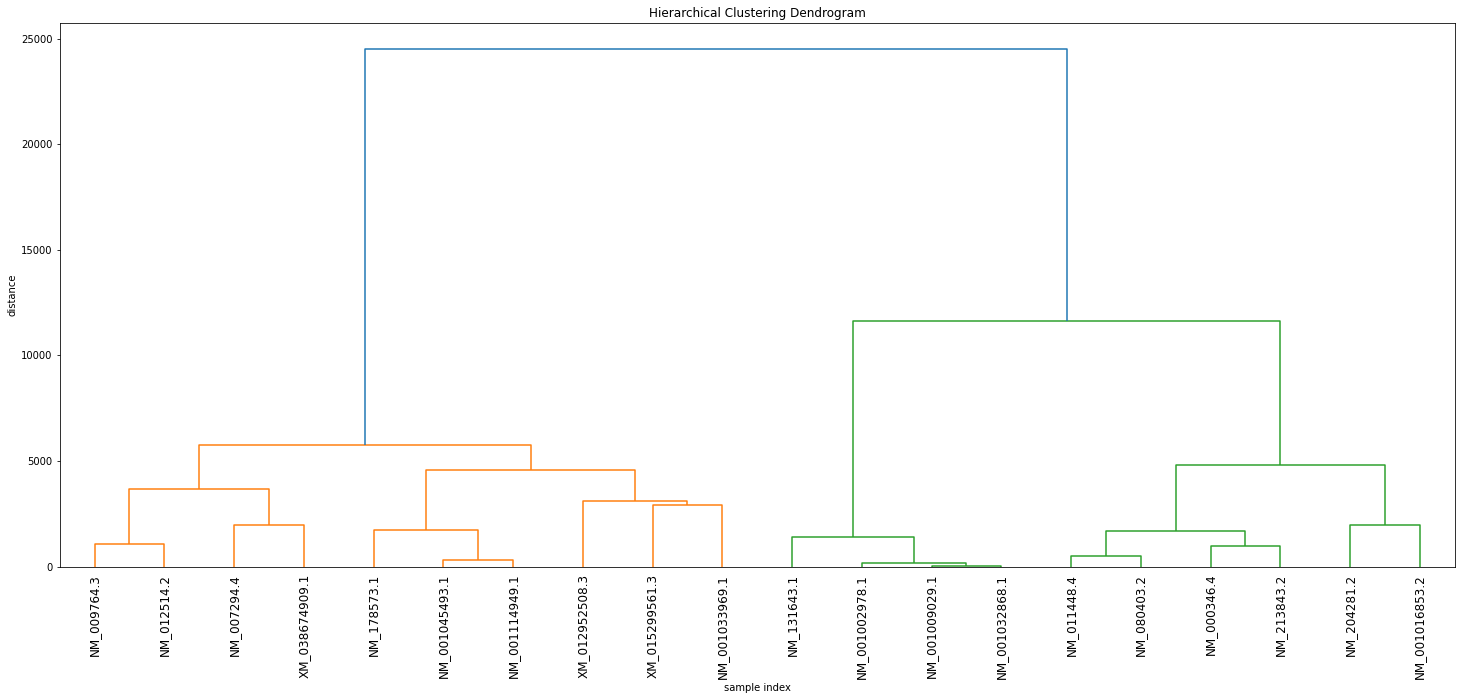

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Z = linkage(adj_new, 'ward')
# plt.figure(figsize=(25, 10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('sample index')
# plt.ylabel('distance')
# dendrogram(Z, labels=labels, leaf_rotation=90)
# plt.show()

# #download the dendrogram
# plt.savefig("dendrogram.png")

#adjust the horizontal scale 
Z = linkage(adj_matrix_pairwise, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels_new, leaf_rotation=90)
plt.show()

In [22]:
num_clusters = 2
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, num_clusters, criterion='maxclust')
from collections import Counter
Counter(clusters)

Counter({2: 18, 1: 2})

In [17]:
from datasketch import MinHash, MinHashLSH


In [20]:
#Now do Minhash for the same sequences1 and sequences2
adj_matrix = [[0 for i in range(len(sequences_pairwise))] for j in range(len(sequences_pairwise))]
#Create a list of MinHash objects
minhashes = []
for i in range(len(sequences_pairwise)):
    minhash = MinHash(num_perm=128)
    kmers = get_kmers(sequences_pairwise[i], 3)
    for kmer in kmers:
        minhash.update(kmer.encode('utf8'))
    minhashes.append(minhash)

for i in range(len(sequences_pairwise)):
    for j in range(i, len(sequences_pairwise)):
        jaccard = minhashes[i].jaccard(minhashes[j])
        adj_matrix[i][j] = jaccard
        adj_matrix[j][i] = jaccard

adj_matrix[0][0]

import numpy as np

adj_new = 1 - np.array(adj_matrix)



/tmp/ipykernel_56805/564086827.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(adj_new, 'ward')


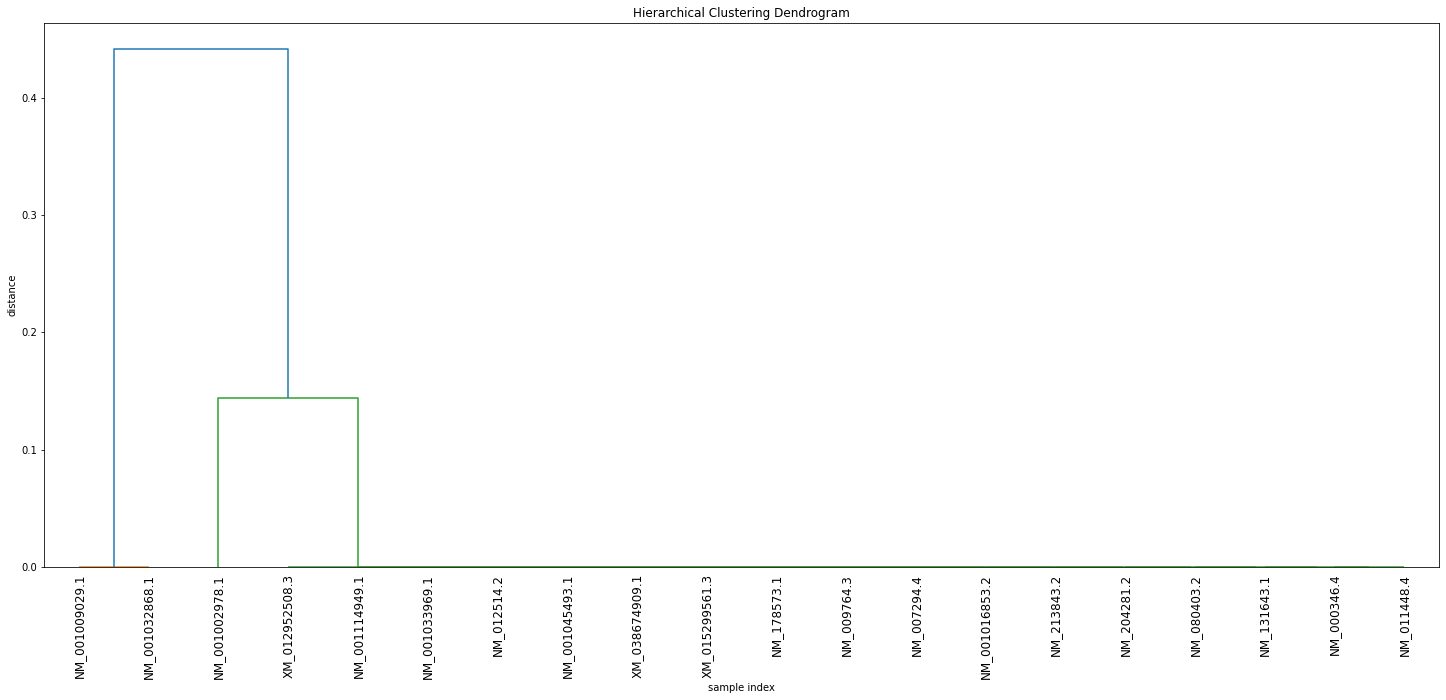

In [21]:
#Now do clustering on the minhashes
Z = linkage(adj_new, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=labels_new, leaf_rotation=90)
plt.show()




In [14]:



#do this in parallel
import multiprocessing
from joblib import Parallel, delayed
import itertools

def pairwise_align(i, j):
    alignments = pairwise2.align.globalxx(sequences_pairwise[i], sequences_pairwise[j])
    alignment_scores = alignments[0][2]
    return alignment_scores

num_cores = multiprocessing.cpu_count()
num_cores = num_cores // 2
results = Parallel(n_jobs=num_cores)(delayed(pairwise_align)(i, j) for i, j in itertools.combinations(range(len(sequences_pairwise)), 2))



/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
/home/monster0811/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consi

In [119]:
#Convert results to adj_matrix_pairwise
adj_matrix_pairwise = [[0 for i in range(len(sequences_pairwise))] for j in range(len(sequences_pairwise))]
index = 0
for i in range(len(sequences_pairwise)):
    for j in range(i+1, len(sequences_pairwise)):
        adj_matrix_pairwise[i][j] = results[index]
        adj_matrix_pairwise[j][i] = results[index]
        index += 1

3166.0